In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller,acf,pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pmdarima.arima import auto_arima


## TASK - 1

In [35]:
test_df = pd.read_csv("DS3_C1_S4_DailyDelhiClimateTest_Data_Practice.csv")
test_df['date'] = pd.to_datetime(test_df['date'])
test_df = test_df.set_index('date')
test_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2017-01-01,15.913043,85.869565,2.743478,59.000000
2017-01-02,18.500000,77.222222,2.894444,1018.277778
2017-01-03,17.111111,81.888889,4.016667,1018.333333
2017-01-04,18.700000,70.050000,4.545000,1015.700000
2017-01-05,18.388889,74.944444,3.300000,1014.333333
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


In [36]:
train_df = pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C1_S4_DailyDelhiClimateTrain_Data_Practice.csv")
train_df['date'] = pd.to_datetime(train_df['date'])
train_df = train_df.set_index('date')
train_df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [37]:
df = pd.concat([train_df, test_df])
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2017-04-20,34.500000,27.500000,5.562500,998.625000
2017-04-21,34.250000,39.375000,6.962500,999.875000
2017-04-22,32.900000,40.900000,8.890000,1001.600000


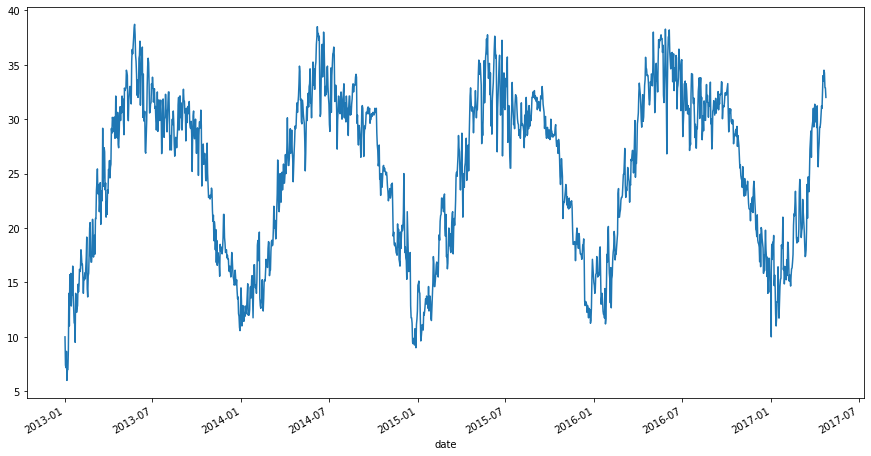

In [38]:
df['meantemp'].plot(figsize=(15,8))
plt.show()

In [48]:
#sample data with respect to 7 days
df1 = df.resample('7D').mean()
print(df1)                           

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01   7.604762  83.295238    2.903810   1017.685714
2013-01-08  13.176871  66.511905    8.013265   1015.942177
2013-01-15  13.409524  80.068027    4.471905   1017.972789
2013-01-22  12.848639  64.748299    4.981973   1019.884694
2013-01-29  16.107653  70.279592    3.396378   1016.554592
...               ...        ...         ...           ...
2017-03-21  27.752381  42.359524   10.662262   1010.076190
2017-03-28  30.346372  35.467687    9.259666   1006.323980
2017-04-04  28.427638  29.095748   12.672740   1007.433617
2017-04-11  30.492063  30.517857    6.395040   1004.809524
2017-04-18  33.432143  30.553741    8.624393   1001.479138

[225 rows x 4 columns]


In [49]:
df_meantemp = df1['meantemp']
print(df_meantemp)

date
2013-01-01     7.604762
2013-01-08    13.176871
2013-01-15    13.409524
2013-01-22    12.848639
2013-01-29    16.107653
                ...    
2017-03-21    27.752381
2017-03-28    30.346372
2017-04-04    28.427638
2017-04-11    30.492063
2017-04-18    33.432143
Freq: 7D, Name: meantemp, Length: 225, dtype: float64


### split the data into train and test into a 70:30 ratio

In [54]:
ss = int(np.round(len(df_meantemp) * 0.7,0))
print('actual length = {}, sample size = {}'.format(len(df_meantemp), ss))
train = df_meantemp[:ss]
test = df_meantemp[ss:]
print('train = {}, test = {}'.format(len(train), len(test)))


actual length = 225, sample size = 158
train = 158, test = 67


In [55]:
train.tail(5)

date
2015-12-08    16.061224
2015-12-15    12.571429
2015-12-22    13.214286
2015-12-29    15.102041
2016-01-05    16.152211
Freq: 7D, Name: meantemp, dtype: float64

In [56]:
test.head(5)

date
2016-01-12    15.099405
2016-01-19    12.233759
2016-01-26    17.418498
2016-02-02    15.067316
2016-02-09    18.157084
Freq: 7D, Name: meantemp, dtype: float64

In [84]:
df2 = df[['meantemp']]
print(df2)

             meantemp
date                 
2013-01-01  10.000000
2013-01-02   7.400000
2013-01-03   7.166667
2013-01-04   8.666667
2013-01-05   6.000000
...               ...
2017-04-20  34.500000
2017-04-21  34.250000
2017-04-22  32.900000
2017-04-23  32.875000
2017-04-24  32.000000

[1576 rows x 1 columns]


In [85]:
# dickey-fuller test for stationarity

def checkStationarity(data):
    pvalue = adfuller(data)[1]
    
    if(pvalue>0.05):
        msg = 'p-value={}. Data is not stationary'.format(pvalue)
    else:
        msg='p-value={}. Data is stationary'.format(pvalue)
        
    return(msg)

In [86]:
ret=checkStationarity(df2); 
ret                                                

'p-value=0.14769623489792477. Data is not stationary'

In [102]:
# difference the data by 1 (default)
diff_df2 = df2 - df2.shift()
print(diff_df2)

            meantemp
date                
2013-01-01       NaN
2013-01-02 -2.600000
2013-01-03 -0.233333
2013-01-04  1.500000
2013-01-05 -2.666667
...              ...
2017-04-20  1.000000
2017-04-21 -0.250000
2017-04-22 -1.350000
2017-04-23 -0.025000
2017-04-24 -0.875000

[1576 rows x 1 columns]


In [103]:
# remove the Nulls from the differenced data and check if the difference data is stationary
checkStationarity(diff_df2.dropna())

'p-value=1.014093812317306e-29. Data is stationary'

### Plot ACF and PACF

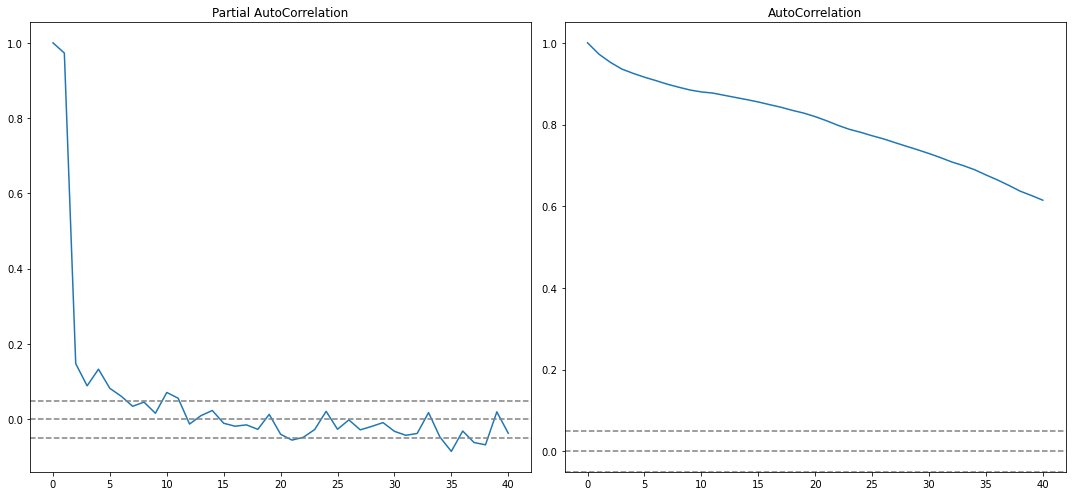

In [108]:
# p -> PACF (partial autocorrelation graph)
# q -> ACF (auto correlation graph)
# d -> differential level (from top)

# since, lags cannot be determined at the beginning, set a random number initially
lag_acf = acf(df2, nlags=40)
lag_pacf = pacf(df2 , nlags=40, method='ols')
fig,ax = plt.subplots(1,2,figsize=(15, 7))
# plot PACF (p)
plt.subplot(121)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df2)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(df2)),linestyle='--',color="gray")
plt.title("Partial AutoCorrelation")

# plot ACF (q)
plt.subplot(122)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color="gray")
plt.axhline(y=-1.96/np.sqrt(len(df2)),linestyle='--',color="gray")
plt.axhline(y=1.96/np.sqrt(len(df2)),linestyle='--',color="gray")
plt.title("AutoCorrelation")

plt.tight_layout()

### Use auto ARIMA for selection of p, d, q

In [110]:
# auto ARIMA (to help in the selection of p,d,q)
from pmdarima.arima import auto_arima
m1 = auto_arima(df2['meantemp'],start_p=0,max_p=2, start_q=0,max_q=2, seasonal=False, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=14776.458, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=12761.169, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=6063.156, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=6004.752, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=6066.979, Time=0.70 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=6036.805, Time=0.16 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6001.754, Time=1.29 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6052.479, Time=0.54 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6061.620, Time=0.48 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=6003.642, Time=1.70 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6094.425, Time=0.32 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=6030.459, Time=0.80 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] inte

## TASK - 2

#### Split the data into a 70:30 ratio

In [112]:
# split the data into train and test
ss = int(0.7 * len(data))

train = df2.iloc[:ss]
test = df2.iloc[ss:]
print("train = {}, test = {}".format(len(train), len(test)))

train = 1103, test = 473


### Build the ARIMA model

In [113]:
# start with initial values for p and q based on auto_arima recommendation
p=1; d=1; q=1
m1 = ARIMA(train['meantemp'],order=(p,d,q)).fit()
print(m1.summary())

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1103
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2088.973
Date:                Wed, 27 Apr 2022   AIC                           4183.946
Time:                        20:22:10   BIC                           4198.961
Sample:                    01-01-2013   HQIC                          4189.626
                         - 01-08-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5664      0.054     10.581      0.000       0.461       0.671
ma.L1         -0.7943      0.043    -18.511      0.000      -0.878      -0.710
sigma2         2.5940      0.080     32.235      0.0

### Predict temperature using the model

In [114]:
# predictions
start = len(train) 
end = len(train) + len(test) - 1

print('start = {}, end = {}'.format(start,end))

predictions = m1.predict(start,end,typ='levels')
print(predictions)

# start = len(train)
# end = len(data) - 1
# print("start = {}, end = {}".format(start,end))

start = 1103, end = 1575
2016-01-09    15.571905
2016-01-10    15.612634
2016-01-11    15.635704
2016-01-12    15.648771
2016-01-13    15.656172
                ...    
2017-04-21    15.665841
2017-04-22    15.665841
2017-04-23    15.665841
2017-04-24    15.665841
2017-04-25    15.665841
Freq: D, Name: predicted_mean, Length: 473, dtype: float64


### Collate actual, predicted, and error values together

In [115]:
# actual vs predicted values
# print("test = {}, predicted = {}".format(len(test), len(predictions) ))
actual = []
pred = []

for i in range(len(predictions)):
    actual.append(test['meantemp'][i])
    pred.append(predictions[i])

df_res = pd.DataFrame({'actual':actual, 'predicted':pred})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

        actual  predicted        err
0    15.857143  15.571905   0.285238
1    15.625000  15.612634   0.012366
2    15.750000  15.635704   0.114296
3    18.000000  15.648771   2.351229
4    18.266667  15.656172   2.610495
..         ...        ...        ...
468  34.500000  15.665841  18.834159
469  34.250000  15.665841  18.584159
470  32.900000  15.665841  17.234159
471  32.875000  15.665841  17.209159
472  32.000000  15.665841  16.334159

[473 rows x 3 columns]


### Plotting errors 

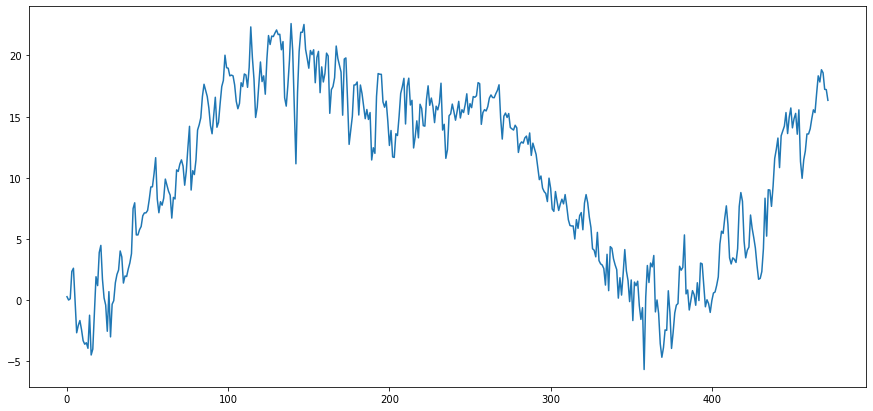

In [119]:
# errors
fig,ax = plt.subplots(figsize=(15, 7))
df_res.err.plot()
plt.show()

### Box-Jenkins test to check model's goodness

In [120]:
# LJung-Box test
pvalue = sm.stats.acorr_ljungbox(m1.resid,lags=[1],return_df=True)['lb_pvalue'].values
if pvalue < 0.05:
    print("Reject H0. Bad model")
else:
    print("Fail-to-Reject H0. Good model")

Fail-to-Reject H0. Good model


### Calculate error terms

In [121]:
# MSE
msg = 'ARIMA Model. Order=(' + str(p) + ',' + str(d) + ',' + str(q) + ')'
mse1 = mean_squared_error(df_res.actual, df_res.predicted)
print(msg + "\n\tMSE = {}\n\tRMSE = {}".format(mse1,np.sqrt(mse1)))

ARIMA Model. Order=(1,1,1)
	MSE = 156.36417726309696
	RMSE = 12.504566256495943


### Plot actual vs. predicted values

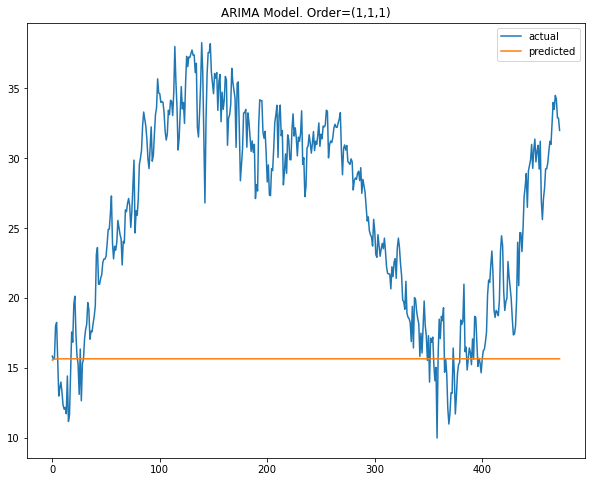

In [123]:
df_res.actual.plot(figsize=(10,8),legend=True)
df_res.predicted.plot(legend=True)
plt.title(msg)
plt.show()

## TASK - 3 

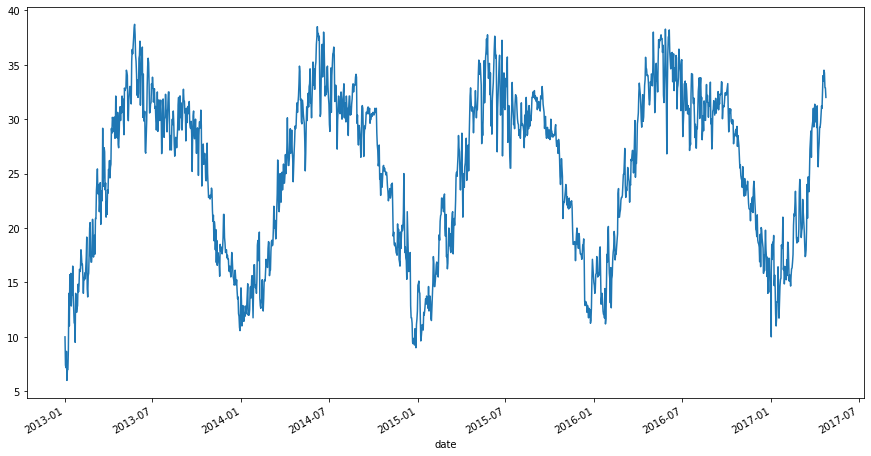

In [129]:
df['meantemp'].plot(figsize=(15,8))
plt.show()

### Build the SARIMA model

In [130]:
# for seasonal data, use the SARIMAX. start with initial values for p,d,q
p=1; q=1; d=1
m1 = sm.tsa.statespace.SARIMAX(df['meantemp'],order=(p,d,q),seasonal_order=(p,d,q,12)).fit()

### Use the model to predict the value


In [131]:
# predict
predictions = m1.predict(start=90,end=104,dynamic=True)

### Collate actual, predicted, and errors together

In [132]:
df_res = pd.DataFrame({'actual':df.meantemp[90:],'predicted':predictions})
df_res['err'] = df_res.actual - df_res.predicted
print(df_res)

               actual  predicted       err
date                                      
2013-04-01  25.375000  24.434589  0.940411
2013-04-02  25.166667  24.051647  1.115020
2013-04-03  26.200000  25.072150  1.127850
2013-04-04  24.600000  25.823444 -1.223444
2013-04-05  25.600000  26.096529 -0.496529
...               ...        ...       ...
2017-04-20  34.500000        NaN       NaN
2017-04-21  34.250000        NaN       NaN
2017-04-22  32.900000        NaN       NaN
2017-04-23  32.875000        NaN       NaN
2017-04-24  32.000000        NaN       NaN

[1486 rows x 3 columns]


### Calculate error terms

In [141]:
new_df=df_res.dropna()

In [164]:
# MSE
mse = mean_squared_error(new_df.actual, new_df.predicted)
print("\n\tMSE = {}\n\tRMSE = {}".format(mse,np.sqrt(mse)))


	MSE = 9.531735783267079
	RMSE = 3.0873509329629307


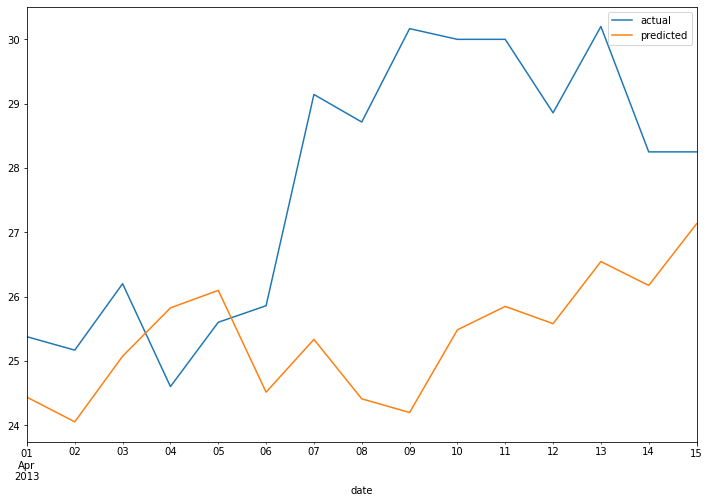

In [144]:
# plot
new_df[['actual','predicted']].plot(figsize=(12,8))
plt.show()

### Forecast the future values using the model

In [148]:
# forecast into the future
p=1; q=1; d=1
m2 = sm.tsa.statespace.SARIMAX(df['meantemp'],order=(p,d,q),seasonal_order=(p,d,q,12)).fit()
fcast = m2.predict(start=len(df), end=len(df)+11, typ='levels').rename('Forecast')
print(fcast)

1576    32.129745
1577    32.107105
1578    32.339848
1579    32.086371
1580    32.330729
1581    32.341272
1582    32.421272
1583    32.386623
1584    32.477569
1585    32.564903
1586    32.554777
1587    32.744787
Name: Forecast, dtype: float64


In [167]:
fcast

1576    32.129745
1577    32.107105
1578    32.339848
1579    32.086371
1580    32.330729
1581    32.341272
1582    32.421272
1583    32.386623
1584    32.477569
1585    32.564903
1586    32.554777
1587    32.744787
Name: Forecast, dtype: float64

### Visualize the forecast

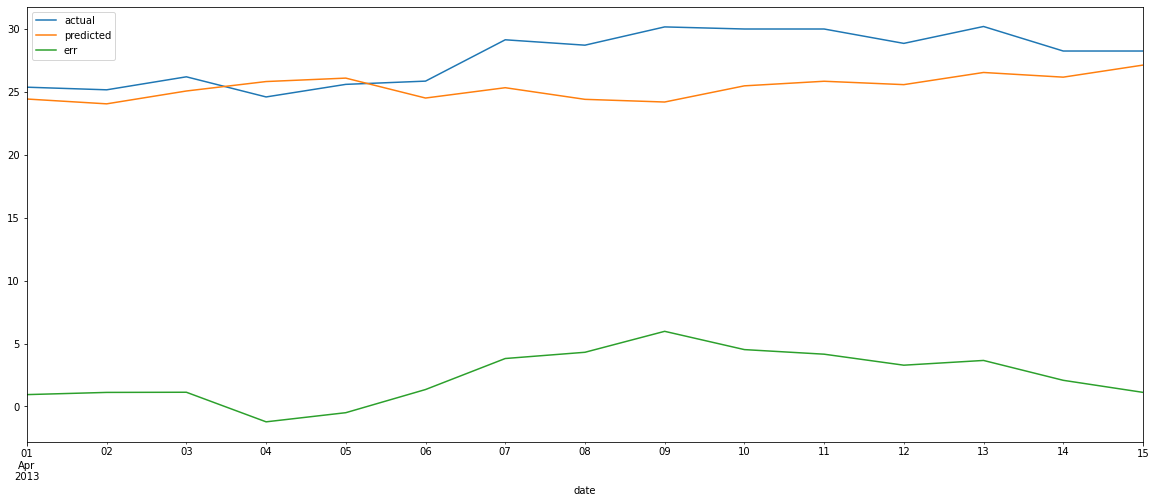

In [169]:
new_df.plot(figsize=(20,8),legend=True)
plt.show() 

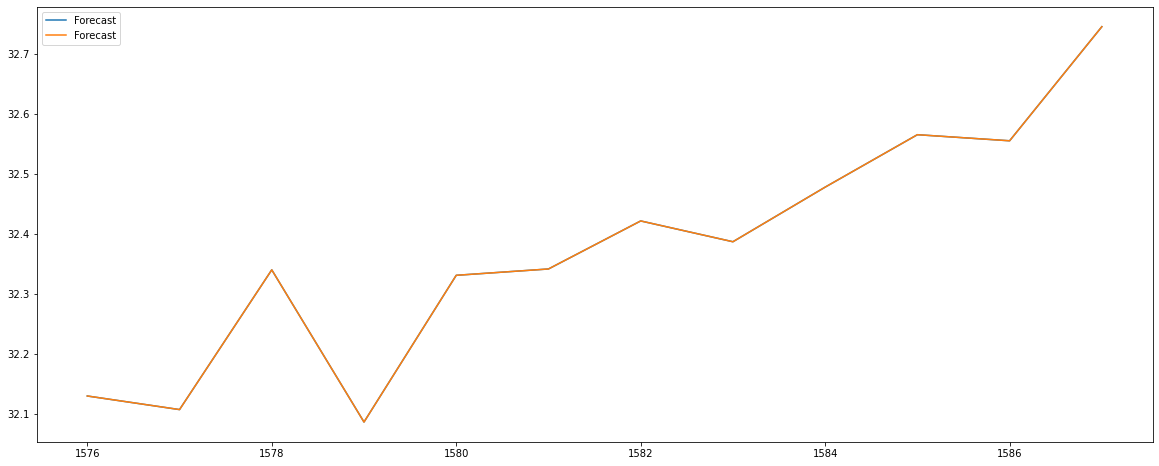

In [166]:
fcast.plot(figsize=(20,8),legend=True)
fcast.plot(legend=True)
plt.show() 